In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("videos_all.csv")
df

,channel_id,channel_name,channel_leaning,video_id,video_title,video_published_at,transcript,cleaned_transcript,political_probability
0,UCOQFfcGRc886dXP2Oyt5OEg,Tim Kellner,right,XBM5lWJmkic,❗️❗️❗️ ATTENTAT auf Michael Stürzenberger ‼️💥P...,2024-05-31T11:36:54Z,breaking new ja furchtbare Nachrichten ein seh...,breaking new ja furchtbare nachrichten ein seh...,0.362124
1,UCOQFfcGRc886dXP2Oyt5OEg,Tim Kellner,right,nldhq-JyRBQ,STERN-Journalist blamiert sich UNENDLICH! 💥⚡️|...,2024-05-30T17:51:52Z,wird immer lustiger im shitol zerstören ist ei...,wird immer lustiger im shitol zerstören ist ei...,0.676739
2,UCOQFfcGRc886dXP2Oyt5OEg,Tim Kellner,right,397nMhb84hA,SKANDAL-Entgleisung: „Freispruch für Höcke?“ 💥...,2024-05-29T17:10:49Z,oh yes heute menstrual Hygiene day geil wichti...,oh yes heute menstrual hygiene day geil wichti...,0.773986
3,UCOQFfcGRc886dXP2Oyt5OEg,Tim Kellner,right,0aTLDQFI55o,SENDUNG entgleitet Moderator TOTAL! 💥⚡️| hart ...,2024-05-28T17:22:08Z,noch mal bedrohlich D D Gigi Agostino erobert ...,noch mal bedrohlich d d gigi agostino erobert ...,0.687639
4,UCOQFfcGRc886dXP2Oyt5OEg,Tim Kellner,right,pK9K6kQel1M,SYLT oder „DIESES Land ist moralisch völlig am...,2024-05-27T06:01:15Z,[Musik] [Musik] ja Freunde jetzt mal ohne Sche...,ja freunde jetzt mal ohne scheiß das ist do ...,0.273171
...,...,...,...,...,...,...,...,...,...
5654,UCF_oOFgq8qwi7HRGTJSsZ-g,Datteltäter,left,i4olbPuleck,FLUCHTURLAUB IM HEIMATLAND - jetzt buchen!!!,2017-05-05T13:01:02Z,"Ah, ein neuer Post von der AfD: Das ist ja der...",ah ein neuer post von der afd das ist ja der h...,0.074164
5655,UCF_oOFgq8qwi7HRGTJSsZ-g,Datteltäter,left,sy0l22ve59I,Talkshow Gast: ISLAMEXPERTE - Das große Casting!,2017-04-28T13:02:58Z,"Ah, Micha, du merkst doch\ngerade, was abgeht....",ah micha du merkst dochgerade was abgeht ich b...,0.850104
5656,UCF_oOFgq8qwi7HRGTJSsZ-g,Datteltäter,left,RcVekqK9Neo,13 Dinge die Kopftuchtragende Frauen kennen (T...,2017-04-21T13:00:03Z,"*Vogelgezwitscher* What? *Musik* Hi! - Hey, sc...",vogelgezwitscher what musik hi hey schöndass ...,0.015041
5657,UCF_oOFgq8qwi7HRGTJSsZ-g,Datteltäter,left,qq7oVq4uBG0,Wie man Muslime auch kennenlernen kann,2017-04-14T13:00:04Z,(Scheppern) (Scheppern und Stimmengewirr) Der ...,scheppern scheppern und stimmengewirr der kali...,0.021943


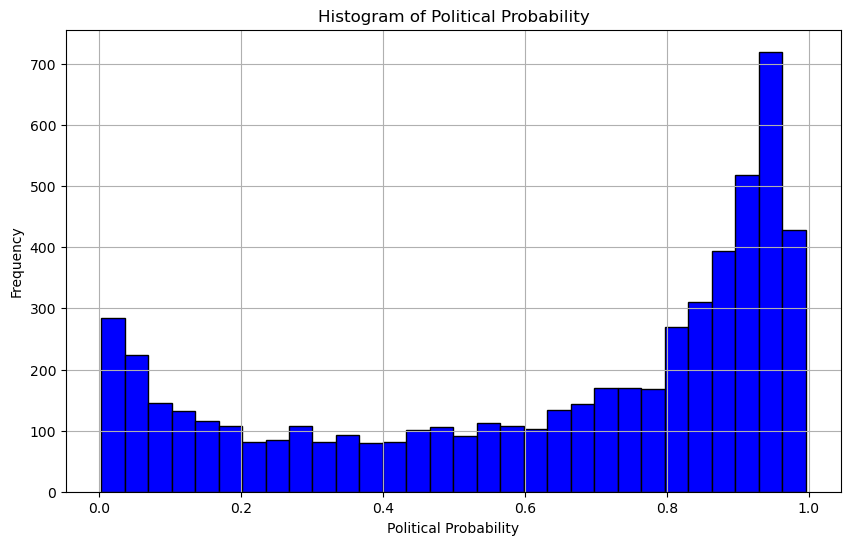

In [38]:
import matplotlib.pyplot as plt
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['political_probability'], bins=30, color='blue', edgecolor='black')
plt.title('Histogram of Political Probability')
plt.xlabel('Political Probability')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig("political_video_distribution.png")
plt.show()

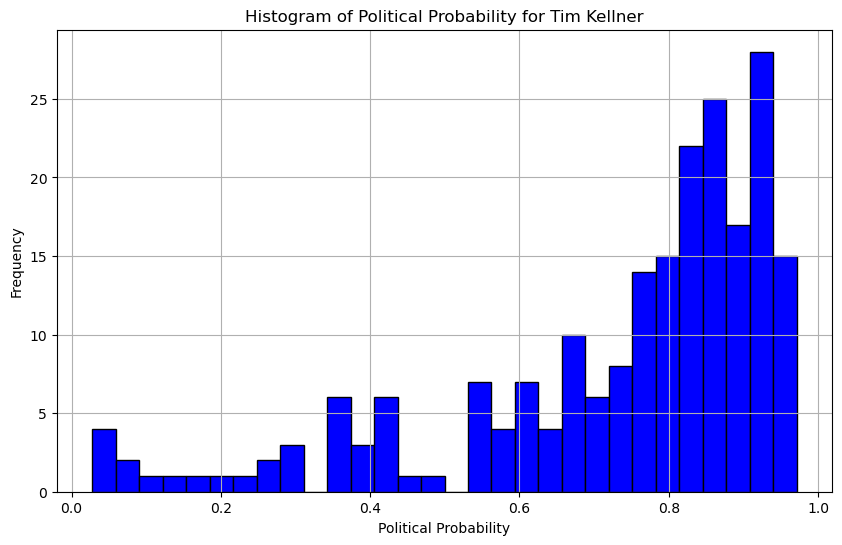

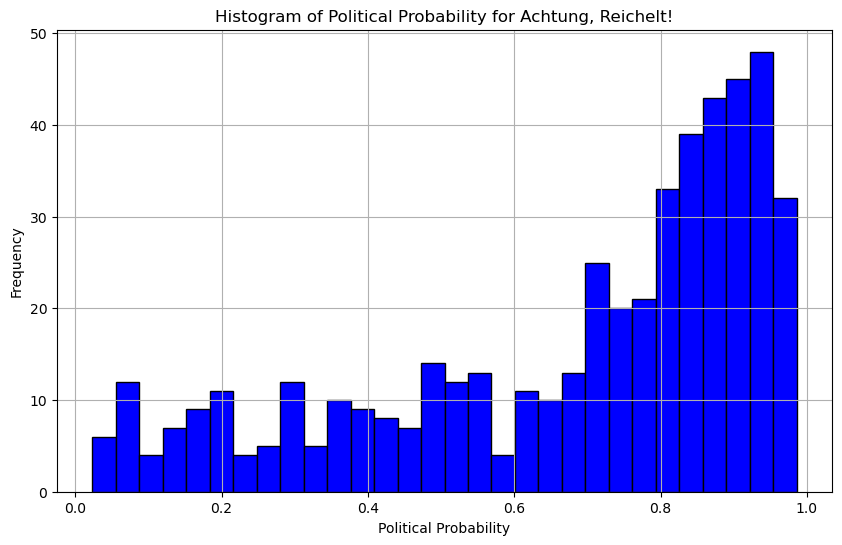

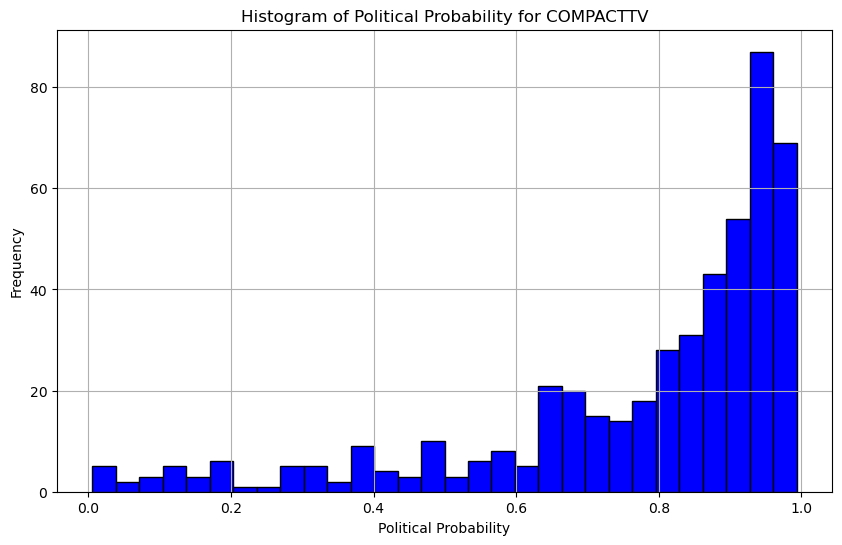

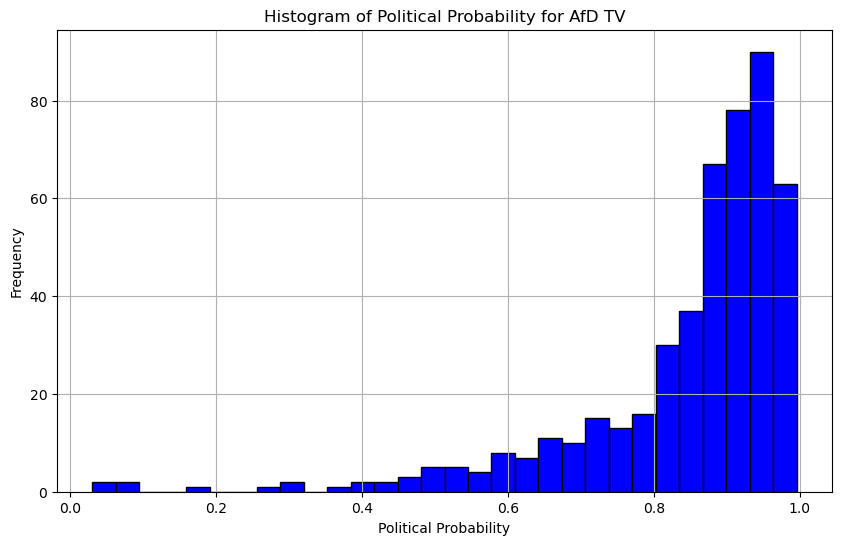

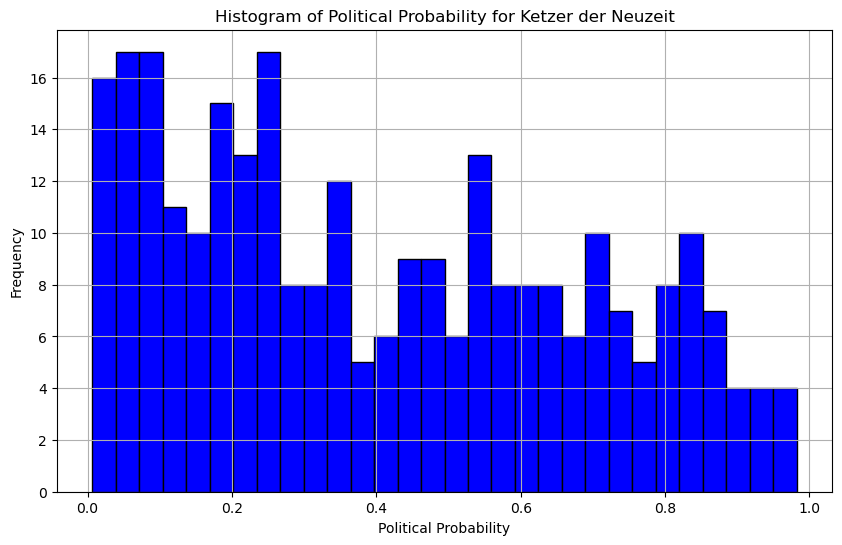

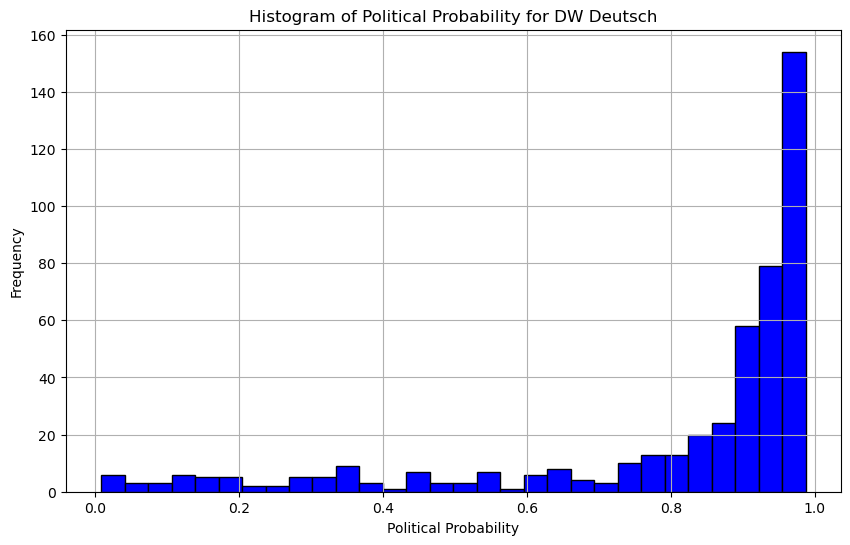

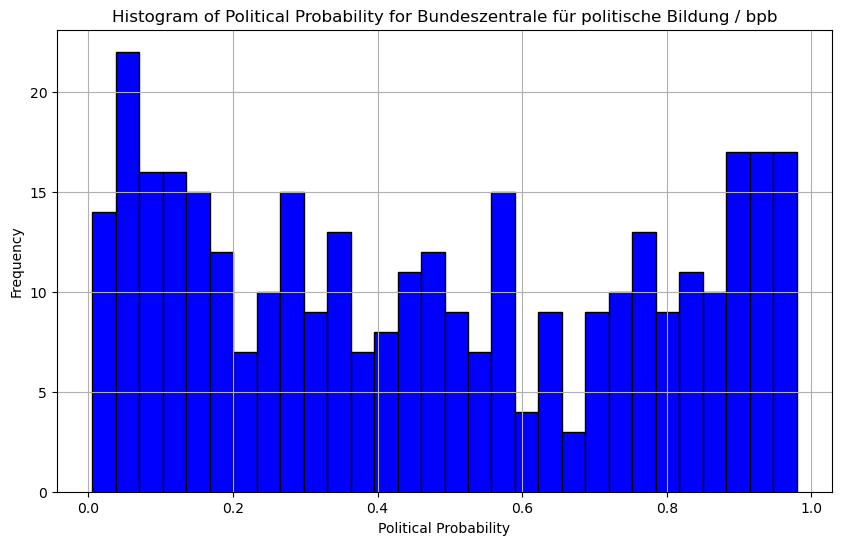

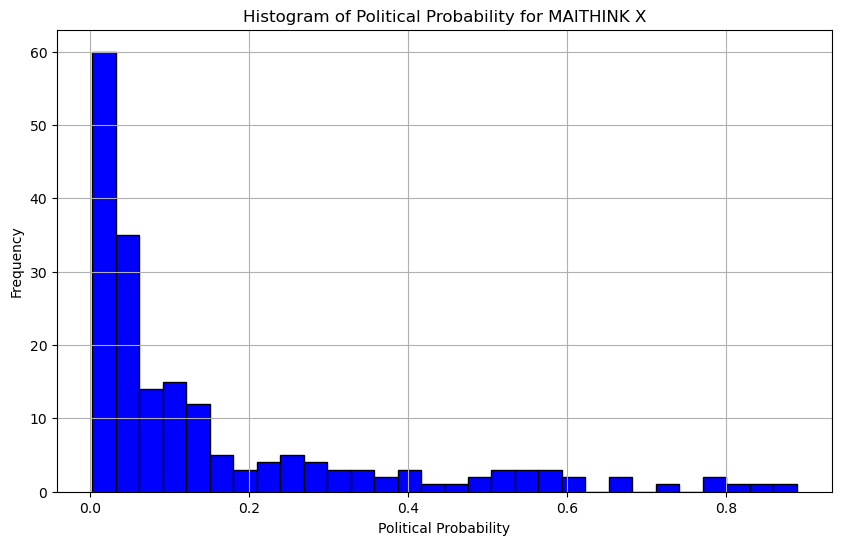

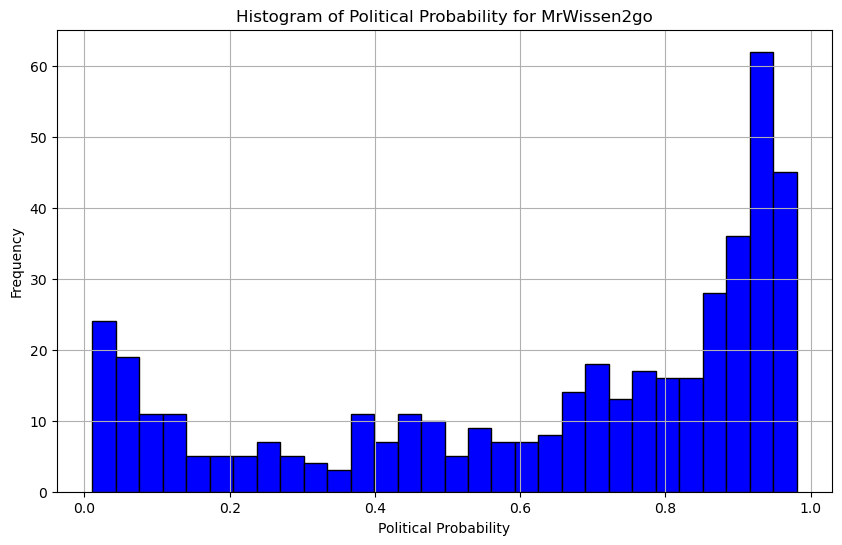

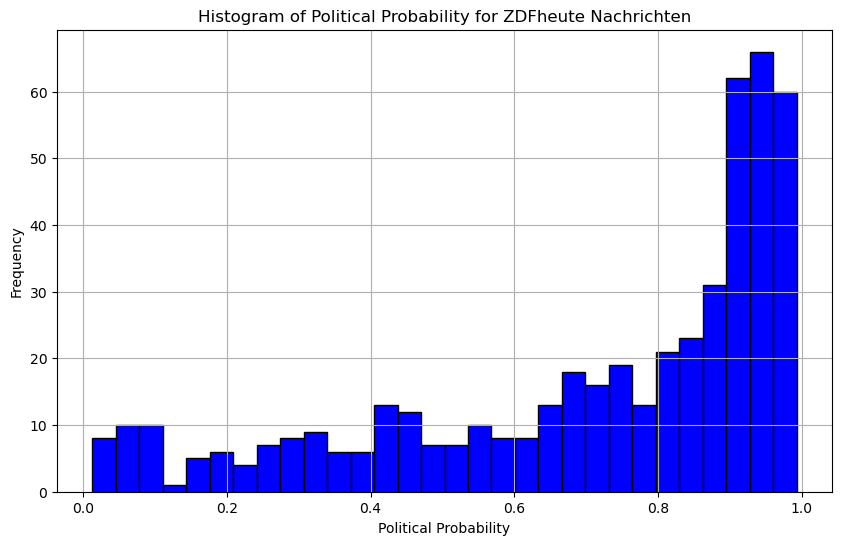

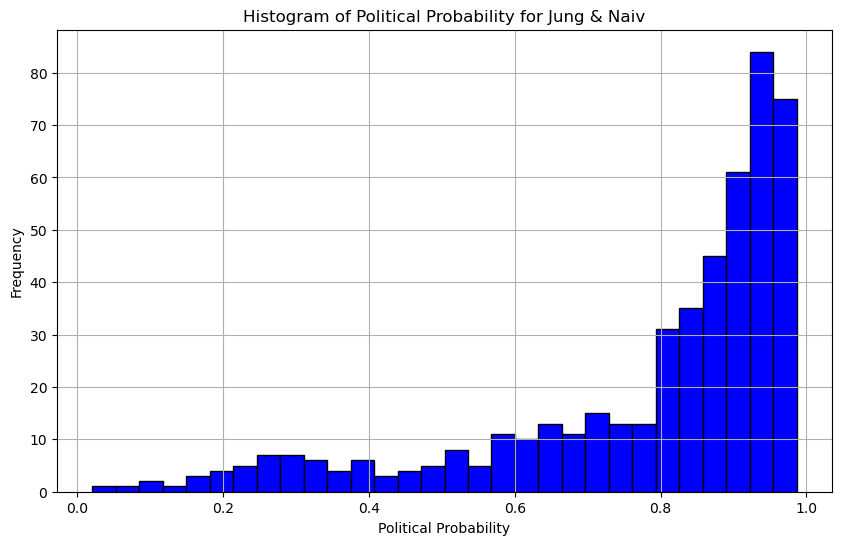

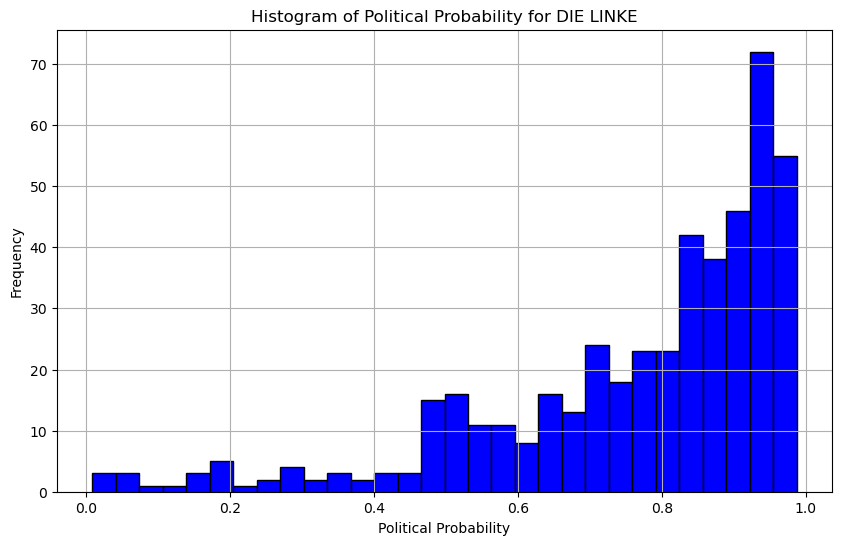

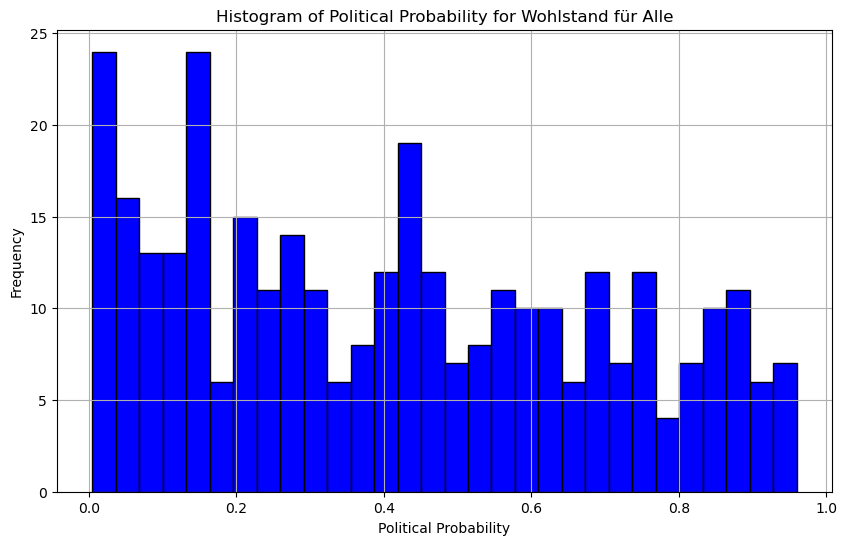

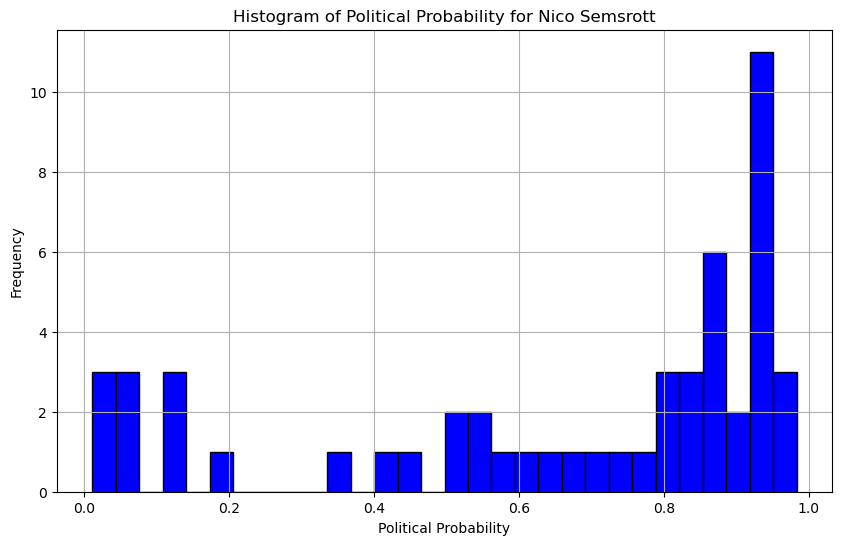

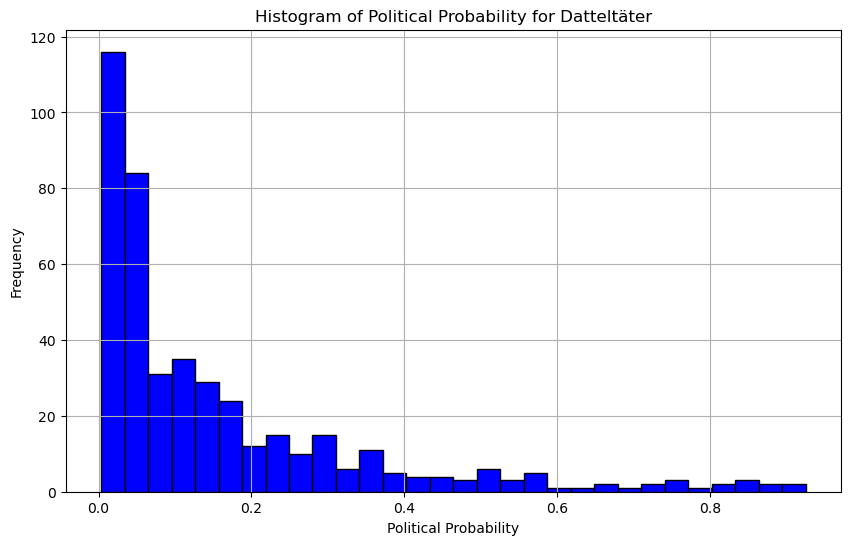

In [4]:
# Assuming df is your dataframe and 'channel' is the column for different channels
channels = df['channel_name'].unique()

for channel in channels:
    plt.figure(figsize=(10, 6))
    channel_data = df[df['channel_name'] == channel]['political_probability']
    plt.hist(channel_data, bins=30, color='blue', edgecolor='black')
    plt.title(f'Histogram of Political Probability for {channel}')
    plt.xlabel('Political Probability')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

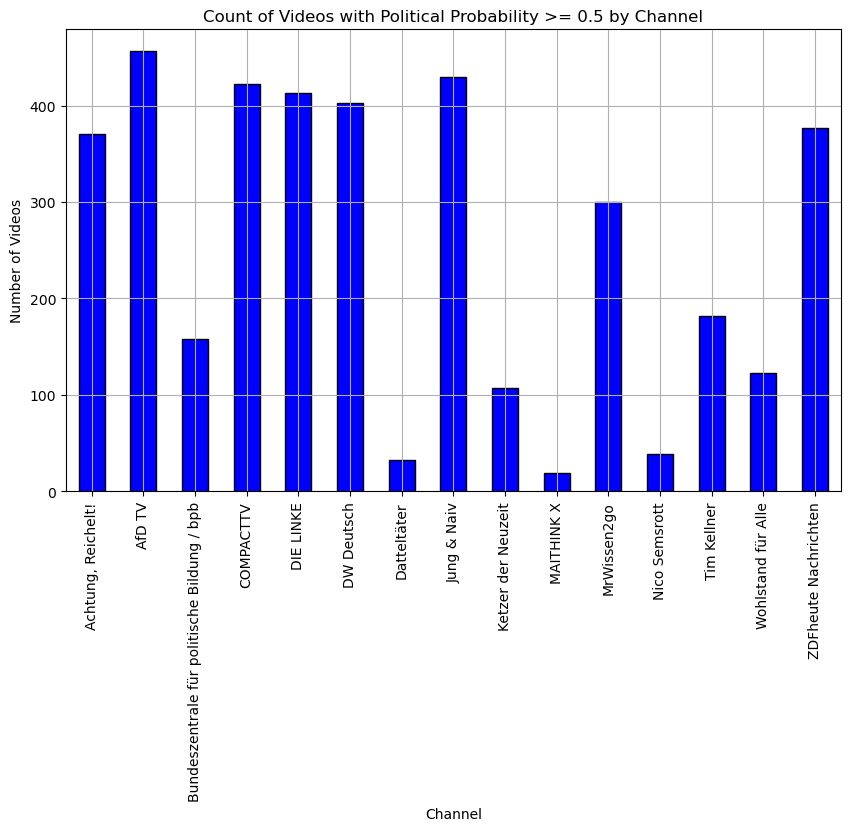

In [18]:

# Filter the dataframe for videos with political_probability >= 0.5
filtered_df = df[df['political_probability'] >= 0.5]

# Count the number of videos for each channel
video_counts = filtered_df['channel_name'].value_counts().sort_index()

# Plot the counts
plt.figure(figsize=(10, 6))
video_counts.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Count of Videos with Political Probability >= 0.5 by Channel')
plt.xlabel('Channel')
plt.ylabel('Number of Videos')
plt.grid(True)
plt.show()

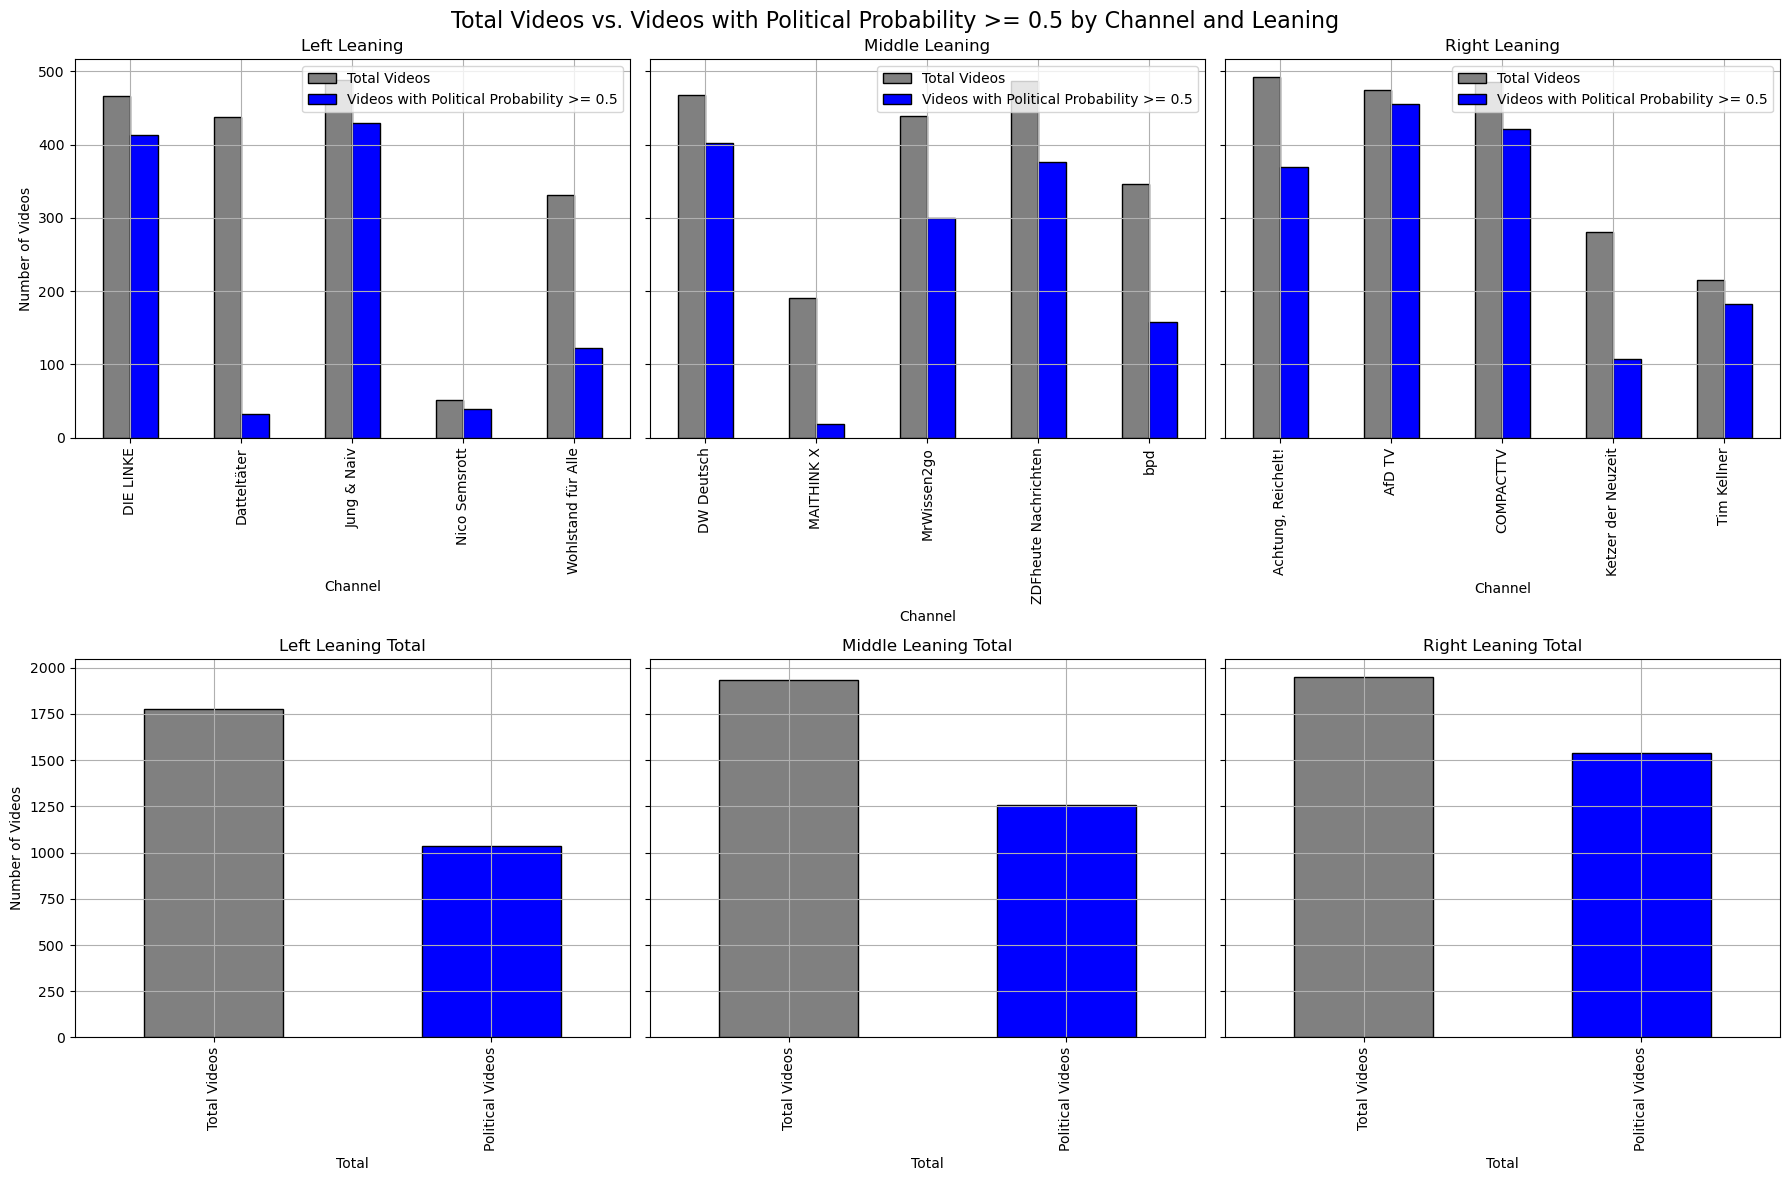

In [39]:
# Create subplots with adjusted layout
fig, axes = plt.subplots(2, 3, figsize=(18, 12), gridspec_kw={'height_ratios': [1, 1]}, sharey='row')

# Function to create plot for a specific leaning
def plot_counts_for_leaning(leaning, ax, ax_total):
    filtered_df = df[(df['political_probability'] >= 0.5) & (df['channel_leaning'] == leaning)]
    total_df = df[df['channel_leaning'] == leaning]
    
    video_counts = filtered_df['channel_name'].value_counts().sort_index()
    total_counts = total_df['channel_name'].value_counts().sort_index()
    
    counts_df = pd.DataFrame({
        'Total Videos': total_counts,
        'Videos with Political Probability >= 0.5': video_counts
    })
    
    # Plot for each channel
    counts_df.plot(kind='bar', color=['gray', 'blue'], edgecolor='black', ax=ax)
    ax.set_title(f'{leaning.capitalize()} Leaning')
    ax.set_xlabel('Channel')
    ax.set_ylabel('Number of Videos')
    ax.grid(True)
    
    # Adding total for specific leaning
    total_counts['Total'] = total_counts.sum()
    video_counts['Total'] = video_counts.sum()
    
    total_df = pd.DataFrame({
        'Total Videos': total_counts,
        'Political Videos': video_counts
    })
    
    # Plot total counts
    total_df.loc['Total'].plot(kind='bar', color=['gray', 'blue'], edgecolor='black', ax=ax_total)
    ax_total.set_title(f'{leaning.capitalize()} Leaning Total')
    ax_total.set_xlabel('Total')
    ax_total.set_ylabel('Number of Videos')
    ax_total.grid(True)

# Plot for each leaning
leanings = ['left', 'middle', 'right']
for i, leaning in enumerate(leanings):
    plot_counts_for_leaning(leaning, axes[0, i], axes[1, i])

fig.suptitle('Total Videos vs. Videos with Political Probability >= 0.5 by Channel and Leaning', fontsize=16)
plt.tight_layout()
plt.savefig("political_videos.png")
plt.show()


In [28]:
df['channel_name'] = df['channel_name'].replace('Bundeszentrale für politische Bildung / bpb', 'bpd')

In [29]:
df.iloc[2608]['channel_name']

'bpd'

In [35]:
# Create a DataFrame with only the videos with political probability >= 0.5
political_videos_df = df[df['political_probability'] >= 0.5]

In [41]:
political_videos_df.to_csv("videos_political.csv", index = False)